In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

# Get the total number of missing values
print(df.isnull().sum().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
0


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Unique values: {df[col].unique()}")


Column: customerID
Unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Column: gender
Unique values: ['Female' 'Male']

Column: Partner
Unique values: ['Yes' 'No']

Column: Dependents
Unique values: ['No' 'Yes']

Column: PhoneService
Unique values: ['No' 'Yes']

Column: MultipleLines
Unique values: ['No phone service' 'No' 'Yes']

Column: InternetService
Unique values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Unique values: ['No' 'Yes' 'No internet service']

Column: OnlineBackup
Unique values: ['Yes' 'No' 'No internet service']

Column: DeviceProtection
Unique values: ['No' 'Yes' 'No internet service']

Column: TechSupport
Unique values: ['No' 'Yes' 'No internet service']

Column: StreamingTV
Unique values: ['No' 'Yes' 'No internet service']

Column: StreamingMovies
Unique values: ['No' 'Yes' 'No internet service']

Column: Contract
Unique values: ['Month-to-month' 'One year' 'Two year']

Column: PaperlessBilling
Unique value

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numerical_cols].describe())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [ ]:
# Replace missing values in 'TotalCharges' with 0 and convert to numeric
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


In [ ]:
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:  #  Add any other numerical columns with missing values
    df[col] = df[col].fillna(df[col].median())


In [ ]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [ ]:
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)


In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Accuracy: 0.8176011355571328
Precision: 0.68125
Recall: 0.5844504021447721
F1-Score: 0.6291486291486291
AUC-ROC: 0.8607800159408739


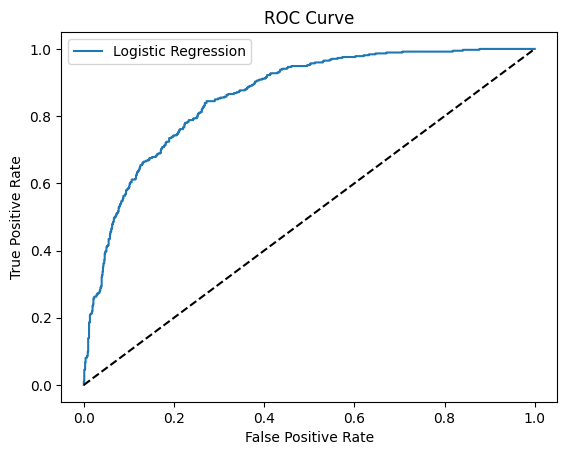

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Accuracy: 0.8176011355571328
Precision: 0.68125
Recall: 0.5844504021447721
F1-Score: 0.6291486291486291
AUC-ROC: 0.8607800159408739


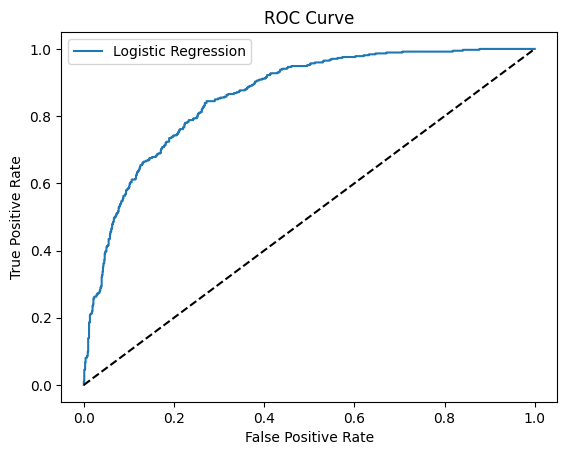

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

                                  Feature  Coefficient  AbsoluteCoefficient
25                      Contract_Two year    -0.695684             0.695684
13                     OnlineSecurity_Yes    -0.586157             0.586157
10            InternetService_Fiber optic     0.548783             0.548783
19                        TechSupport_Yes    -0.534545             0.534545
7                        PhoneService_Yes    -0.448273             0.448273
26                   PaperlessBilling_Yes     0.407732             0.407732
24                      Contract_One year    -0.389833             0.389833
8          MultipleLines_No phone service     0.273235             0.273235
15                       OnlineBackup_Yes    -0.250382             0.250382
23                    StreamingMovies_Yes     0.248498             0.248498
28         PaymentMethod_Electronic check     0.228114             0.228114
0                           SeniorCitizen     0.222155             0.222155
9           

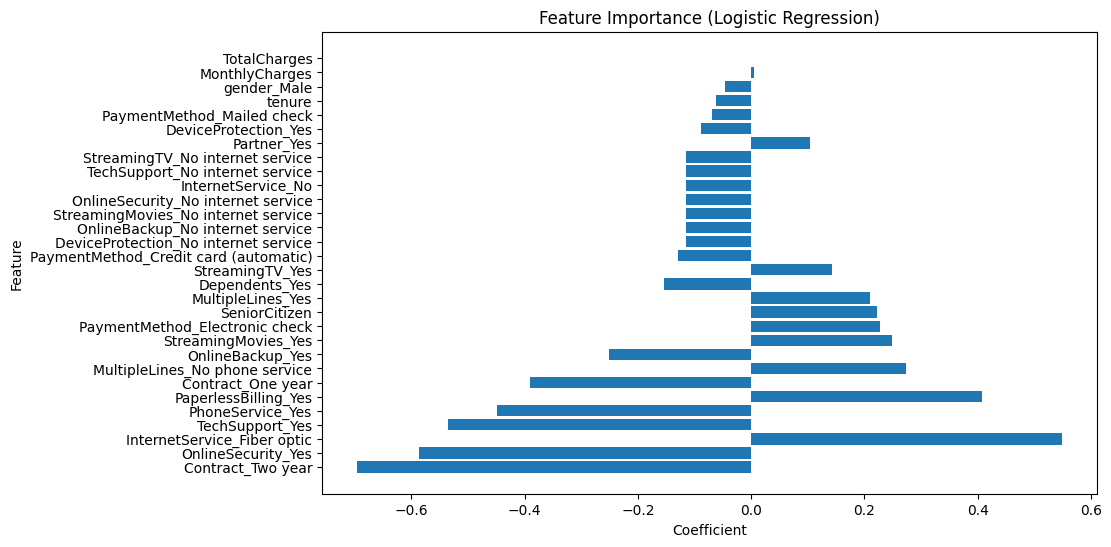

In [ ]:
# Get feature names
feature_names = X_train.columns
# Get coefficients
coefficients = model.coef_[0]

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance['AbsoluteCoefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='AbsoluteCoefficient', ascending=False)

print(feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.show()

In [ ]:
X_test['Predicted_Churn'] = y_pred
X_test['Churn_Probability'] = y_pred_proba


In [ ]:
def segment_customer(probability):
    if probability >= 0.7:  # Adjust thresholds as needed
        return 'High Risk'
    elif probability >= 0.3:
        return 'Medium Risk'
    else:
        return 'Low Risk'

X_test['Customer_Segment'] = X_test['Churn_Probability'].apply(segment_customer)

print(X_test['Customer_Segment'].value_counts())


Customer_Segment
Low Risk       880
Medium Risk    424
High Risk      105
Name: count, dtype: int64


In [ ]:
segment_analysis = X_test.groupby('Customer_Segment').agg({
    'tenure': 'mean',
    'MonthlyCharges': 'mean',
    'TotalCharges': 'mean',
    'Predicted_Churn': 'mean'  # Average churn rate within the segment
}).reset_index()
print(segment_analysis)


  Customer_Segment     tenure  MonthlyCharges  TotalCharges  Predicted_Churn
0        High Risk   5.276190       82.370000    463.160952         1.000000
1         Low Risk  42.754545       57.202841   2812.264773         0.000000
2      Medium Risk  17.504717       74.726533   1526.628066         0.507075
